# Boston House Price Prediction

import the important libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now Import Data from sckit learn library

In [3]:
from sklearn.datasets import load_boston 

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [5]:
boston = load_boston()

In [6]:
type(boston)  # its showing this is a bunch of data

sklearn.utils.Bunch

In [7]:
boston.keys() # these are the keys of boston dataset.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
boston.DESCR # its not very easy to read

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

A real estate company "Prime homes" has a new project coming up in which they have built the new homes in different locations in Boston.
They have a rough idea about prices, but an actual price is not decided yet. They want prices such that houses can be easily afforded by common people.

DATASET DESCRIPTION- 

CRIM - per capita crime rate by town

ZN  - the proportion of residential land zoned for lots over 25000 sq ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river;  0 otherwise.

NOX -  nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE -  proportion of owner-occupied units built prior to 1940

DIS - weighted distance to five Boston employment centers

RAD -  index of accessibility to radial highways

TAX - full value property tax rate per $10,000

PTRATIO - pupil teacher ratio by own

B- 1000 (BK - 0.63) ^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median Value of owner-occupied  homes in $1000's

In [9]:
boston.feature_names # these are the columns in boston

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.target # this is the target data in boston

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
data = boston.data

In [12]:
type(data) # currently its in numpy array now i will convert into dataframe

numpy.ndarray

In [13]:
data.shape # boston data have 506 rows and 13 columns

(506, 13)

In [14]:
data = pd.DataFrame(data = data, columns = boston.feature_names)

In [15]:
data.head() # in this there is no price column, because it was in boston target data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
data['Price'] = boston.target # now I have added price column in our data.


In [17]:
data.head() # Have a look its included now

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Understand the Data

In [18]:
data.describe() # its shows statistics value for each features in data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
data.info() # this shows our data have all value in float64 , and its using 55.4 kb memory in system

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [20]:
data.isnull()  # now I am checking that is there any null value in my data. isnull() function gives result in boolean.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
data.isnull().sum() # its better than above one, now can see easily there s no null value in our dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Data Visualization

I will do Scatterplot Matrix to visualize the pair wise relationships and coorelations between different features.
also it helps to check Outliers and Multicollinearity if any between variables

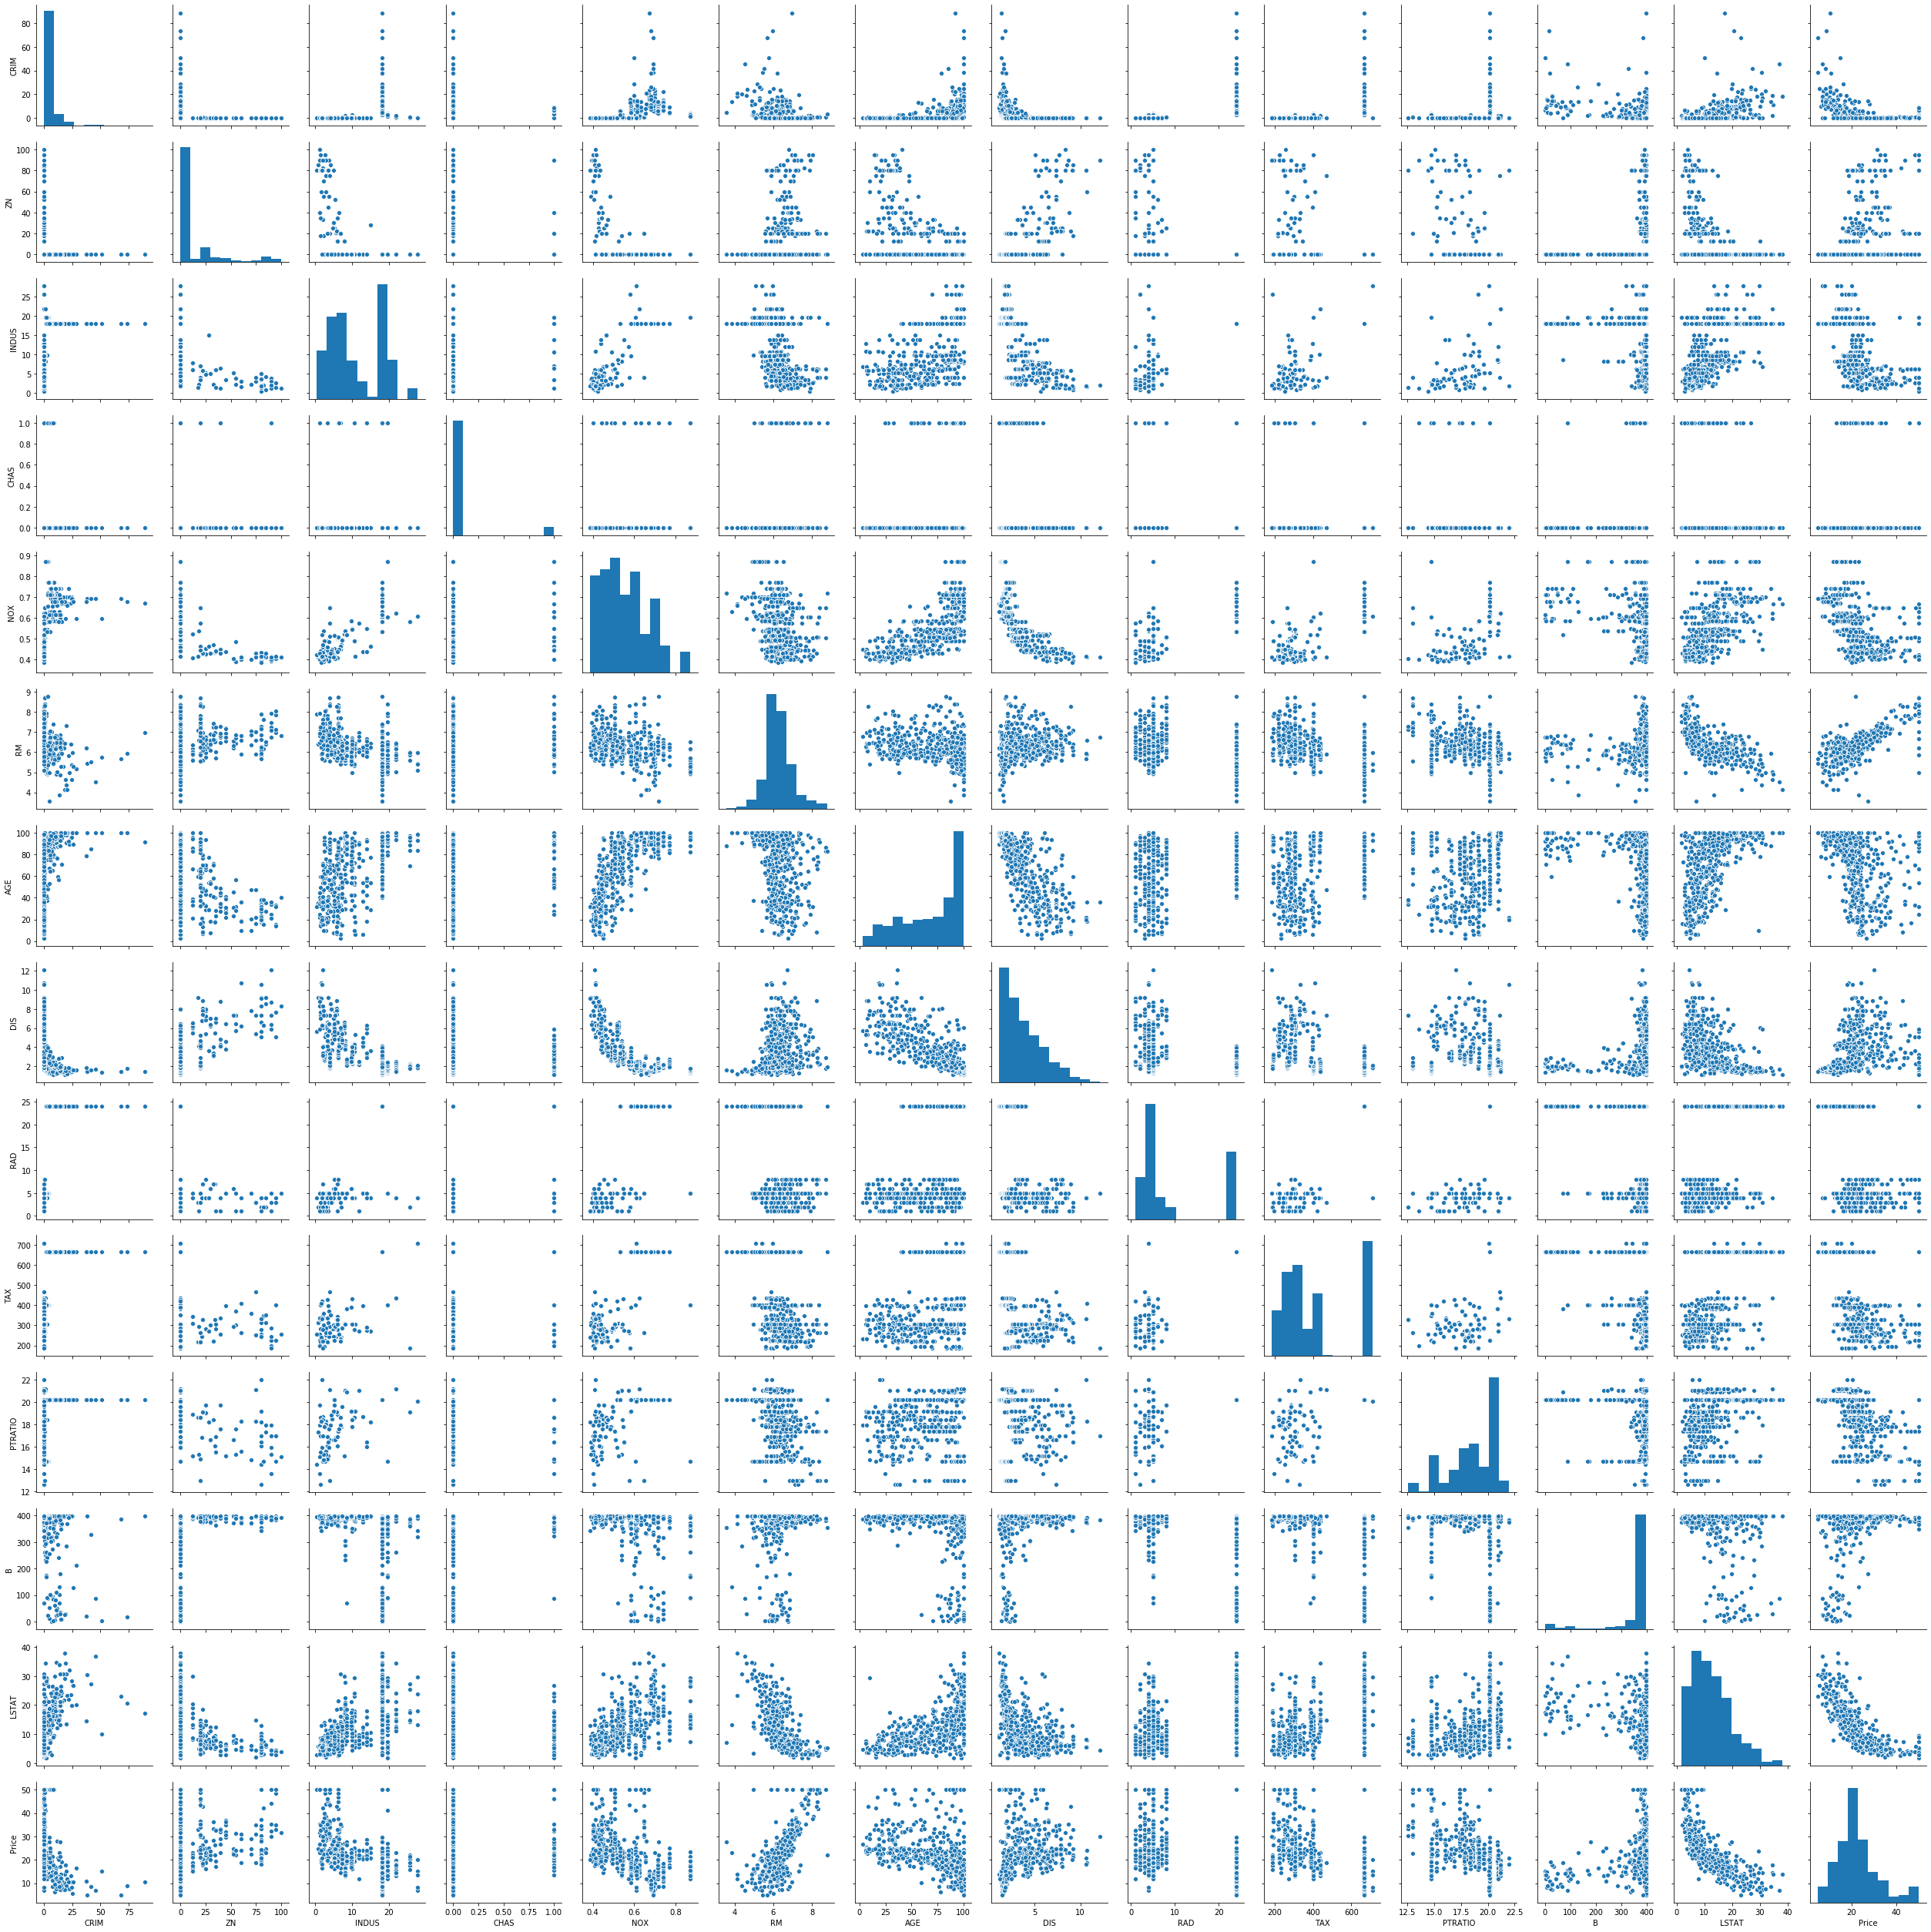

In [22]:
sns.pairplot(data)  # seaborn pairplot use to see relationship between features including target variable

# in the figure can see price having negative corelation with - LSTAT
#  RM (Total No of rooms) having linear correlation with price, and data is also normally distributed.
# CRIM , ZN , CHAS - these are negatively sekwed .

 Now I will do Distribution plot before doing coorelation matrix because if feature is not well distributed then it might not help to predict the target variable.

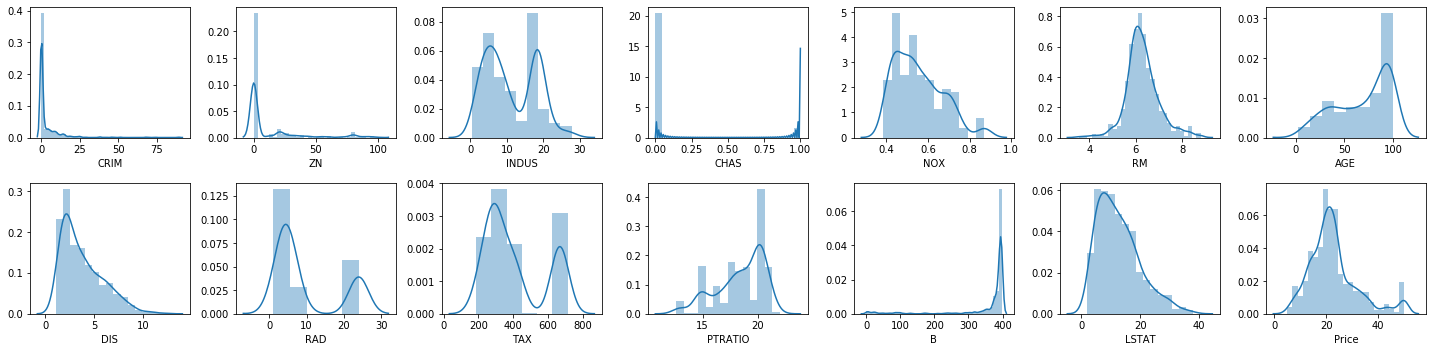

In [23]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows , ncols = cols, figsize = (20,5)) # it will show 2, 7 axis 
# now creating distribution plot on this.

col = data.columns # it will return the total no of column
index = 0
for i in range(rows): # this for loop will run into rows
        for j in range(cols): # this for loop will run into cols, # now run distribution plot from seaborn library
            sns.distplot(data[col[index]], ax = ax[i][j]) # in data passing for the col and selectinf first feature index
            index = index + 1 
            
plt.tight_layout()           
 # it helps to show grids in very well behaved manner. not overlap with each other

by looking our distribution graph its clearly visible CRIME , ZN, CHAS are not good for adding to build model as these are negatively skewed.

RM is normally distributed

normal distribution means having very high chance of positive coorelation with target variable



# Correalrtion Matrix 
It helps to quanitfy and summarize the relationship between variables

In [24]:
corrmat = data.corr()
corrmat

# rm is correlated with price = 0.69
# LSSTAT coor with price  = -0.73 its shows negative correlation.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Heatmap

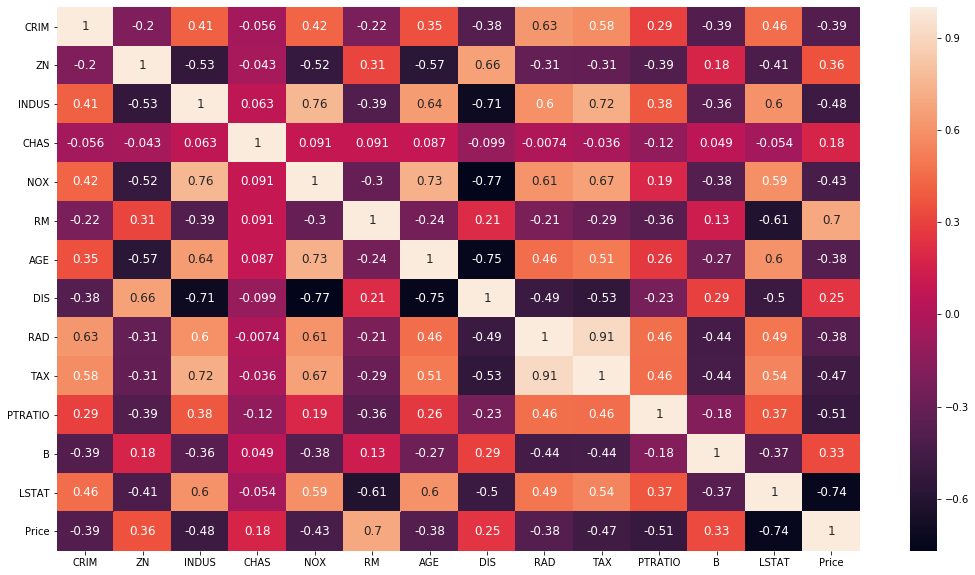

In [25]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

# annot = true means keeps the data value in each cell
# annot_kws = annot keword take data in dictionary, i am puttind size as 12

In [26]:
data.corr().index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

Defining a function to get correlated features with price by assigning threshold

In [28]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df
 # if absolute value of correlation data index is higher than given threshold then add index.   

In [29]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [30]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [31]:
correlated_data = data[corr_value.index]

In [32]:
correlated_data  #now these are the feature which is match with price.

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
5,6.430,18.7,5.21,28.7
6,6.012,15.2,12.43,22.9
7,6.172,15.2,19.15,27.1
8,5.631,15.2,29.93,16.5
9,6.004,15.2,17.10,18.9


# Pairplot and Corrmat of correlated data

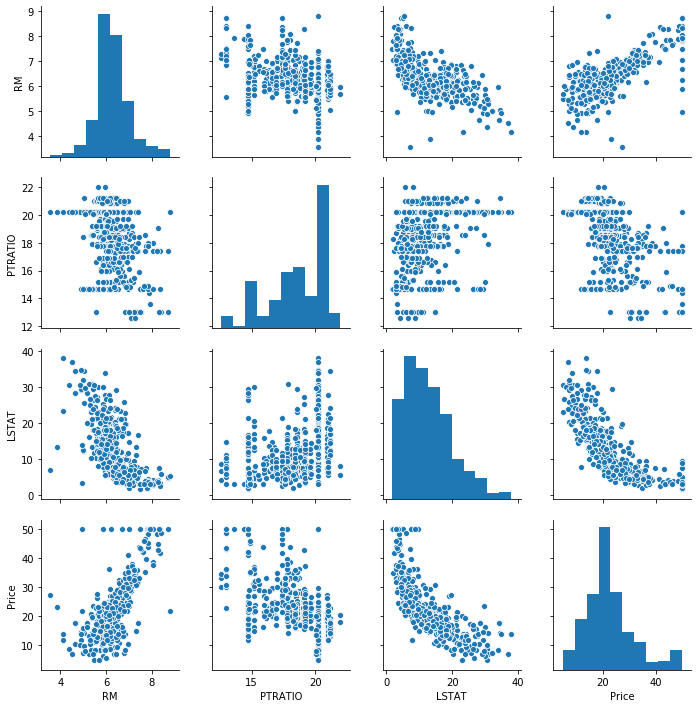

In [33]:
sns.pairplot(correlated_data)

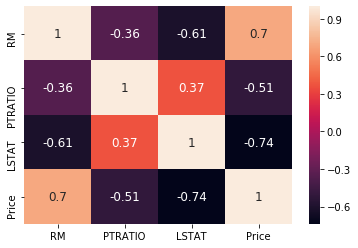

In [34]:
sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size' : 12})

# Train and Test split of Correlated_data

In [40]:
x = correlated_data.iloc[:, 0:3]

In [43]:
x.shape

(506, 3)

In [44]:
x.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [47]:
y = correlated_data.iloc[:, -1]

In [48]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [54]:
X_train.head(2)

,RM,PTRATIO,LSTAT
220,6.951,17.4,9.71
71,5.961,19.2,9.88


In [55]:
X_test.head(2)

,RM,PTRATIO,LSTAT
329,6.333,16.9,7.34
371,6.216,20.2,9.53


In [56]:
Y_train.head(2)

220    26.7
71     21.7
Name: Price, dtype: float64

In [57]:
Y_test.head(2)

329    22.6
371    50.0
Name: Price, dtype: float64

In [59]:
X_train.shape , X_test.shape

((404, 3), (102, 3))

# Now Fit the Linear Model

In [60]:
lm = LinearRegression()
lm.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = lm.predict(X_test)

In [62]:
y_pred

array([27.60903054, 22.09903399, 26.52925454, 12.50798575, 22.25487898,
       20.17063891, 19.66763431, 21.17945215, 17.05361787, 21.47645249,
       14.61188065, 17.25203106, 17.87834594,  4.63763054, 39.49396811,
       34.51171811, 21.51354177, 38.44114322, 30.01522647, 22.1120067 ,
       25.01756609, 25.47821806, 18.29949317, 27.53525285, 22.04425617,
        9.8766314 , 17.64455251, 22.58495171, 35.56415926, 19.94695236,
       17.07488901, 18.54782062, 23.03506219, 24.0227991 , 27.32559903,
       17.39669651, 11.20037267, 21.01877579, 17.99452878, 13.48338053,
       27.03969738, 20.22025653, 25.79579308, 13.77875148, 28.87448892,
       25.92551494, 21.42412497, 24.76182896, 11.37786561, 23.54614643,
       24.91747489, 16.26246249, 23.05899832, 35.50989662, 14.52731963,
       22.83041034, 22.00550472, 20.52680975, 19.80762071, 18.37114766,
       23.84391837, 21.86386107, 32.71351223, 30.0351469 , 16.94378867,
       32.09219353, 19.25207073, 22.18373343, 18.91244658, 21.76

In [64]:
New_data = pd.DataFrame(data = [y_pred , Y_test])

In [67]:
New_data.T  # T use for transpose

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
5,20.170639,19.9
6,19.667634,20.6
7,21.179452,18.7
8,17.053618,16.1
9,21.476452,18.6


# Finding r2

In [68]:
from sklearn.metrics import r2_score

In [69]:
correlated_data.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [74]:
score = r2_score(Y_test,y_pred)

In [75]:
score

0.48816420156925056

In [76]:
MAE =  mean_absolute_error(Y_test,y_pred)

In [77]:
MAE

4.404434993909258

In [78]:
MSE = mean_squared_error(Y_test,y_pred)

In [79]:
MSE

41.67799012221684

Text(0, 0.5, 'Predicted Y')

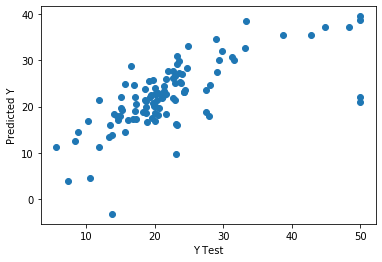

In [80]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')